
## Subhashree Karmakar-2023DC04223

## Import Libraries

In [171]:
# Import necessary libraries for data processing, visualization, and machine learning.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import warnings 
warnings.filterwarnings('ignore')

# Load the dataset

In [172]:
# Load the dataset from CSV file using the correct separator (;).
bank = pd.read_csv("C:/Users/subha/Desktop/BITS LEARNING/ML/Assignment/bank-full.csv",sep=';')

# Display the dataset's dimensions (rows and columns).

In [173]:
bank.shape
bank.info()
print (bank.head(2))
bank.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
   age         job  marital  education default  balance housing loan  contact  \
0   58  management

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Target Variable Distribution Analysis

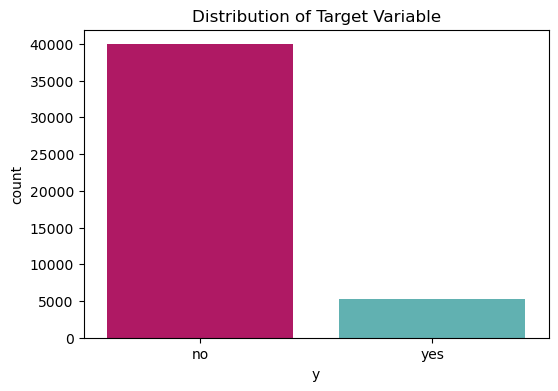

In [174]:
df=bank
plt.figure(figsize=(6, 4))
sns.countplot(x=df['y'],palette=["#c80064", "#54bebe"])
plt.title("Distribution of Target Variable")
plt.show()


# Correlation Heatmap for Numerical Features
Visualizing the correlation matrix to uncover relationships and patterns among numerical features.

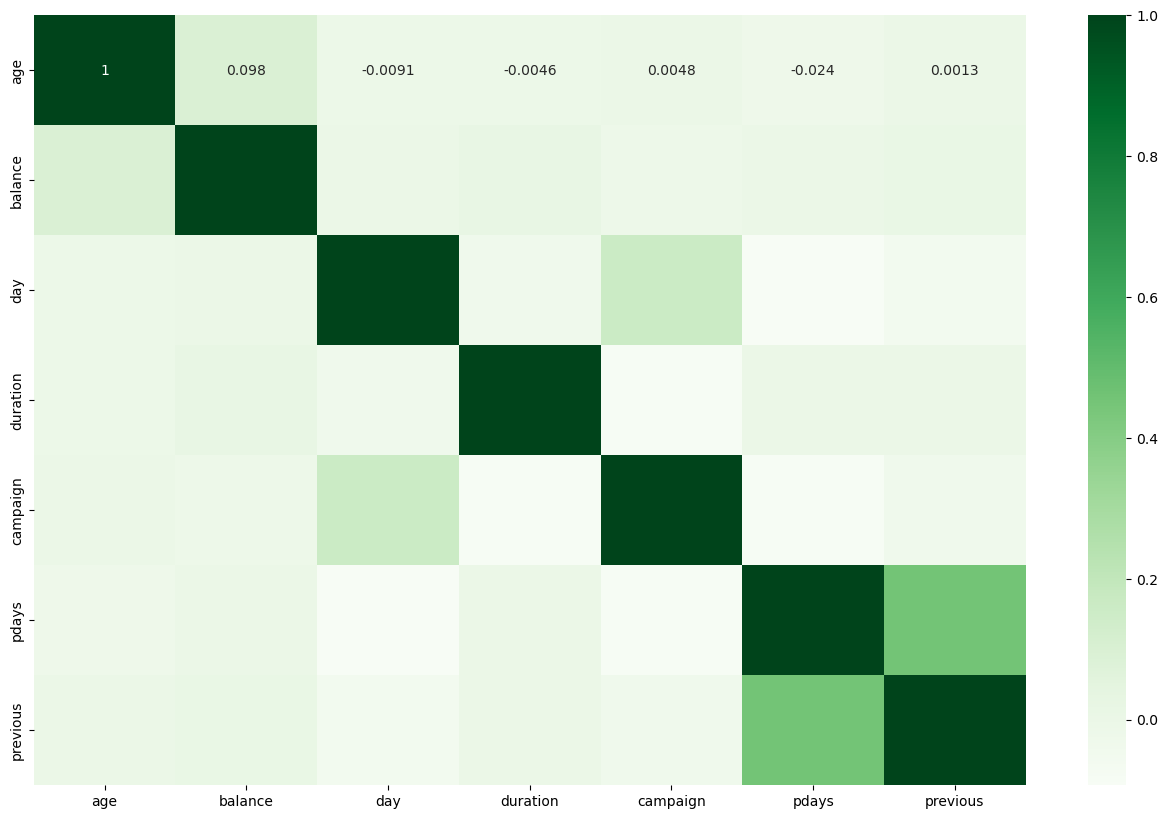

In [175]:
plt.figure(figsize=(16,10))
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap='Greens', annot=True)
plt.show()

# Customer Demographics and Deposit Trends Analysis
Visualizing key demographic factors — such as age, occupation, marital status, education, and loan status — to explore their impact on term deposit trends.

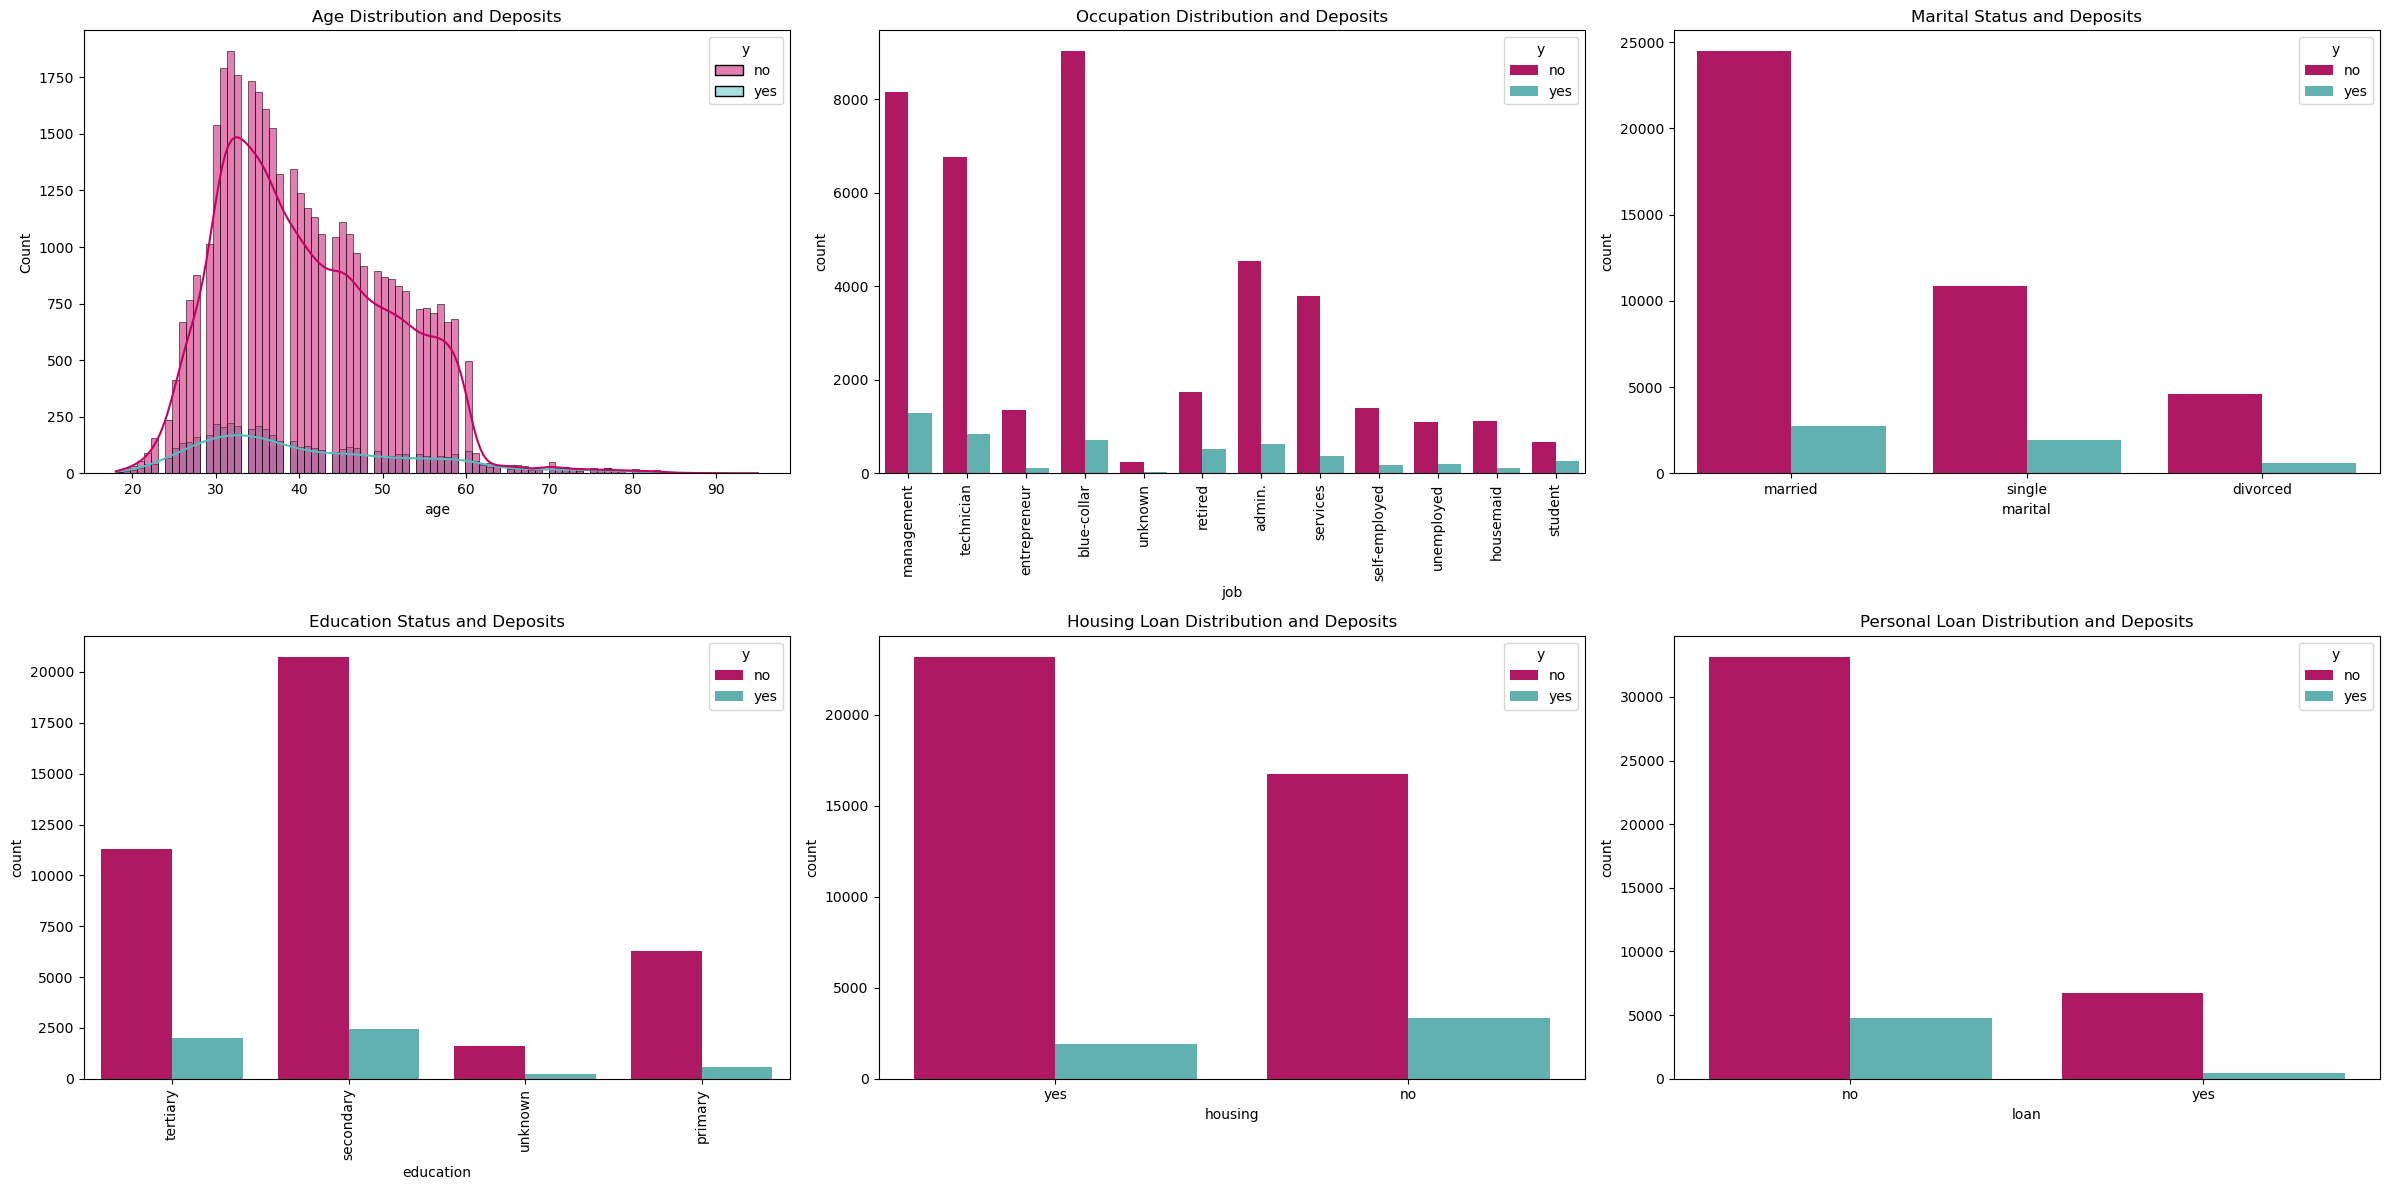

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(2, 3, figsize=(24, 12))

# Age Distribution
sns.histplot(x="age", data=bank, kde=True, hue="y", ax=axes[0, 0],palette=["#c80064", "#54bebe"])
axes[0, 0].set_title("Age Distribution and Deposits")

# Occupation Distribution
sns.countplot(x="job", data=bank, hue="y", ax=axes[0, 1],palette=["#c80064", "#54bebe"])
axes[0, 1].set_title("Occupation Distribution and Deposits")
axes[0, 1].tick_params(axis='x', rotation=90)

# Marital Status Distribution
sns.countplot(x="marital", data=bank, hue="y", ax=axes[0, 2],palette=["#c80064", "#54bebe"])
axes[0, 2].set_title("Marital Status and Deposits")

# Education Distribution
sns.countplot(x="education", data=bank, hue="y", ax=axes[1, 0],palette=["#c80064", "#54bebe"])
axes[1, 0].set_title("Education Status and Deposits")
axes[1, 0].tick_params(axis='x', rotation=90)

# Housing Loan Distribution
sns.countplot(x="housing", data=bank, hue="y", ax=axes[1, 1],palette=["#c80064", "#54bebe"])
axes[1, 1].set_title("Housing Loan Distribution and Deposits")

# Personal Loan Distribution
sns.countplot(x="loan", data=bank, hue="y", ax=axes[1, 2],palette=["#c80064", "#54bebe"])
axes[1, 2].set_title("Personal Loan Distribution and Deposits")

plt.tight_layout()
plt.show()

# Deposit Subscription Outcome Analysis  
A pie chart illustrating the proportion of customers who subscribed (`yes`) versus those who did not (`no`) to the term deposit.

# Box Plot of Numerical Features  
A box plot visualizing the distribution of numerical features and identifying potential outliers in the dataset.  

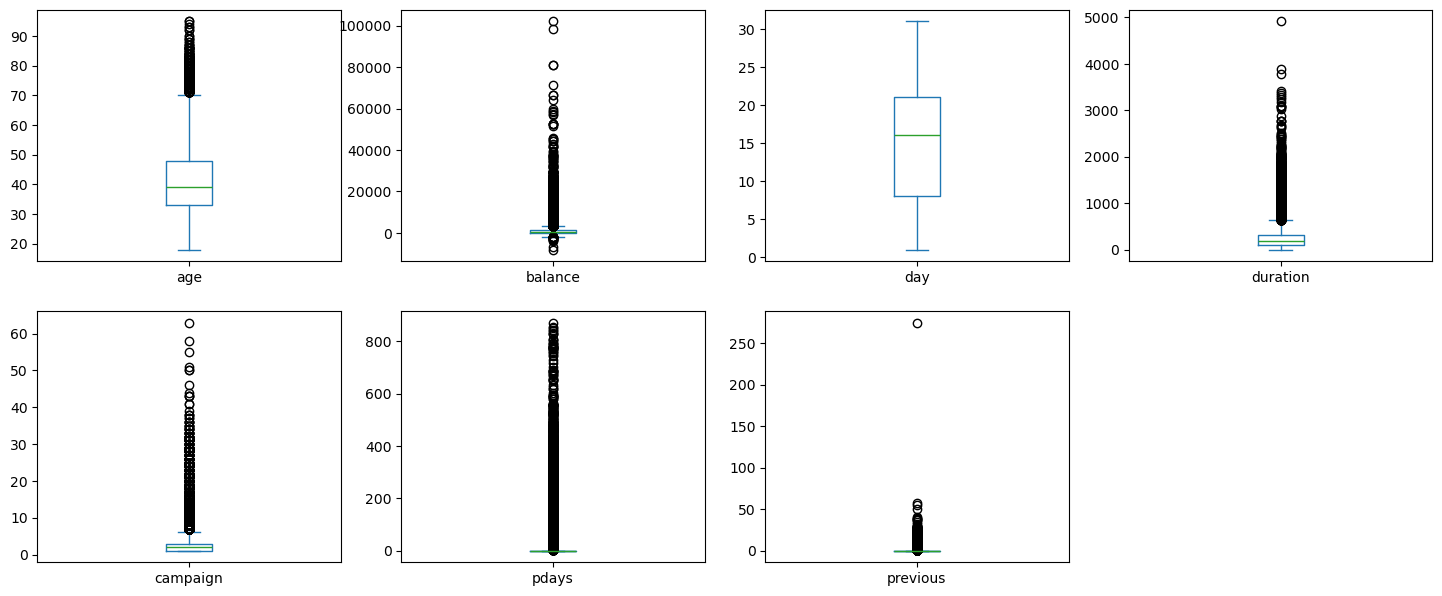

In [177]:
df.plot(kind='box',subplots=True,figsize=(18,15),layout=(4,4))
plt.show()

# Data Preprocessing Steps  

### (a) Handling Missing Values  
Counts missing values in each column to assess data completeness.  

### (b) Handling Outliers Using IQR  
Removes outliers from numerical features using the Interquartile Range (IQR) method and evaluates skewness after cleaning.  

### (c) Encoding Categorical Variables  
Applies Label Encoding to convert categorical features into numerical format for model compatibility.  

### (d) Feature Scaling  
Standardizes or normalizes numerical features to enhance model performance and convergence.  

### (e) Feature Importance Using Correlation  
Calculates feature correlations with the target variable to identify key predictors.  

### (f) Visualization of Important Features  
Presents a bar chart of feature correlations with the target variable to emphasize their predictive strength.

Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Skewness of numerical features after outlier handling:
age         0.383147
balance     1.342548
day         0.107774
duration    1.038646
campaign    1.154766
pdays       0.000000
previous    0.000000
dtype: float64

Feature correlation with target variable:
y            1.000000
duration     0.249188
education    0.066943
balance      0.065914
marital      0.051474
job          0.036033
default     -0.014151
age         -0.026754
day         -0.032742
month       -0.048328
loan        -0.058121
campaign    -0.059817
housing     -0.126700
contact     -0.137866
pdays             NaN
previous          NaN
poutcome          NaN
Name: y, dtype: float64


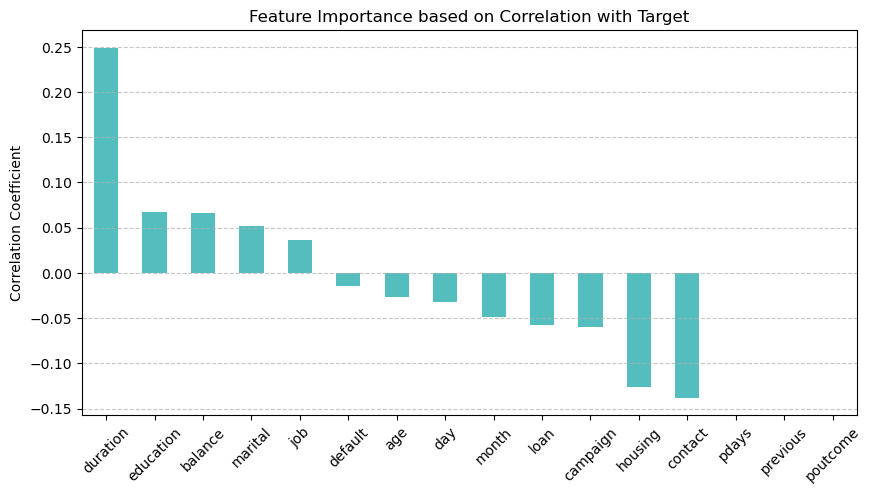

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# (a) Handling Missing Values
print("Missing values in each column:")
print(df.isnull().sum())

# (b) Handling Outliers using IQR method
numerical_cols = df.select_dtypes(include=['number']).columns

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
df_clean = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Checking for skewness
print("\nSkewness of numerical features after outlier handling:")
print(df_clean[numerical_cols].skew())

# (c) Encoding Categorical Variables
categorical_cols = df_clean.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# (d) Feature Scaling - Choose either Standardization or Normalization
scaler = StandardScaler()  # Use Standardization for models like Logistic Regression, SVM
# scaler = MinMaxScaler()  # Use Normalization for distance-based models like KNN, Neural Networks
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

# (e) Feature Importance using Correlation
target_variable = "y"  # Target is already binary (0 or 1)
correlation_with_target = df_clean.corr()[target_variable].sort_values(ascending=False)

print("\nFeature correlation with target variable:")
print(correlation_with_target)

# (f) Visualization of Important Features
plt.figure(figsize=(10, 5))
correlation_with_target.drop(target_variable).plot(kind='bar', color='#54bebe')  # Matched blue color
plt.title("Feature Importance based on Correlation with Target")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# Feature Correlation Heatmap  

### Overview  
- Encodes categorical variables using Label Encoding to convert them into numerical form.  
- Computes the correlation matrix to analyze relationships between features.  
- Visualizes the correlation heatmap with a `coolwarm` color scheme for improved readability.  

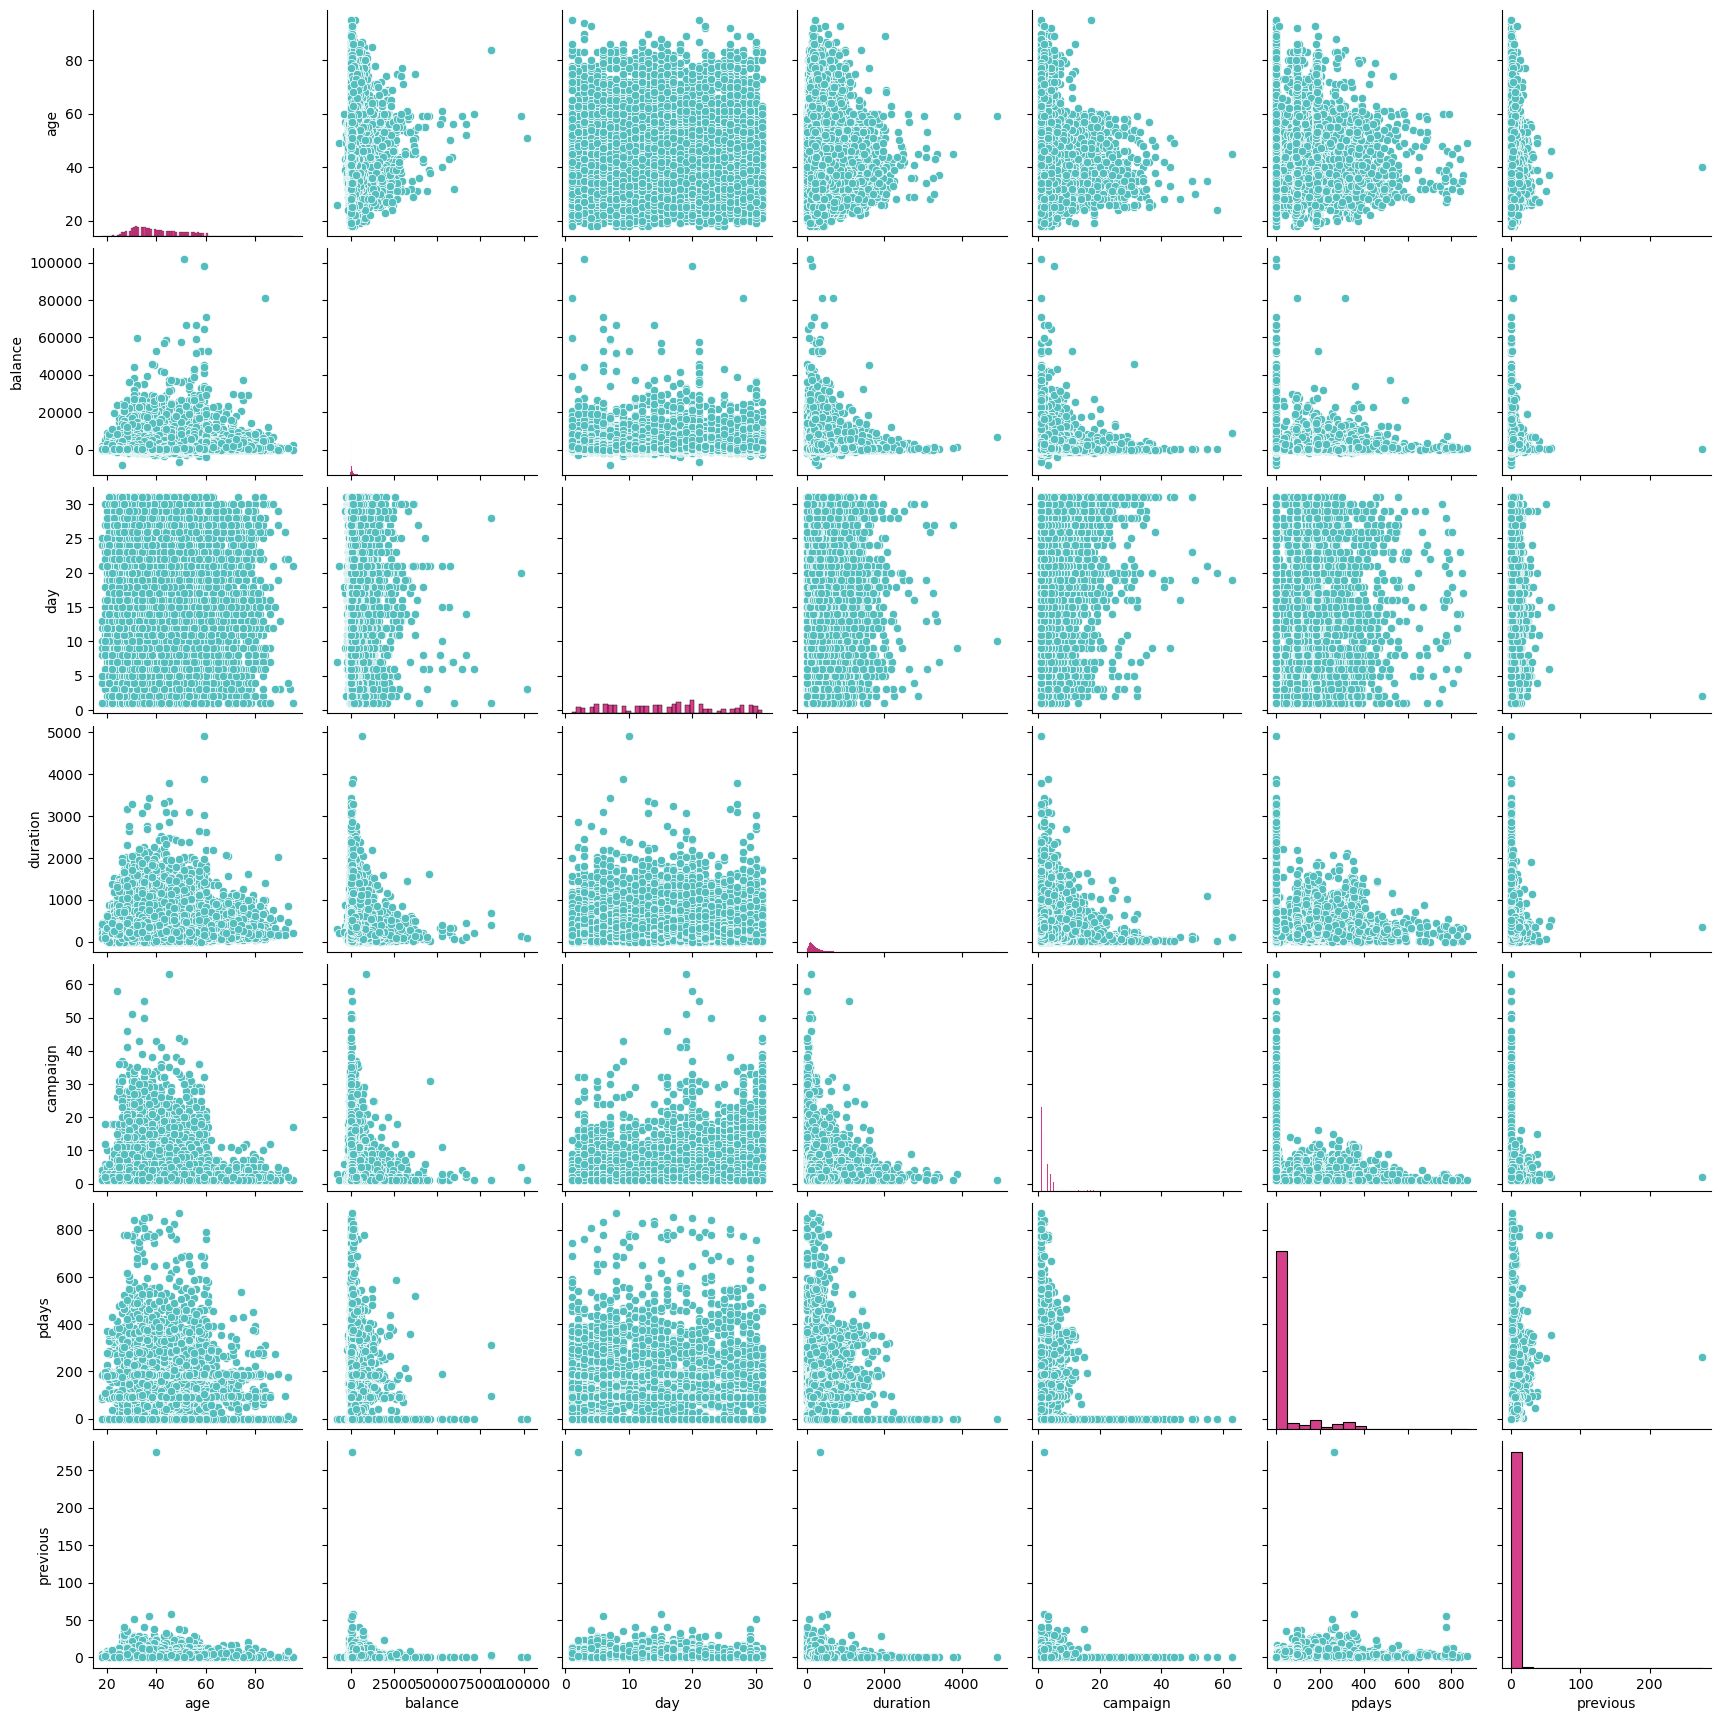

In [179]:
df=bank
sns.pairplot(
    df.select_dtypes(include=['number']),
    diag_kws={'color': '#c80064'},  # Red for histograms
    plot_kws={'color': '#54bebe'}   # Green for scatter plots
)
plt.show()

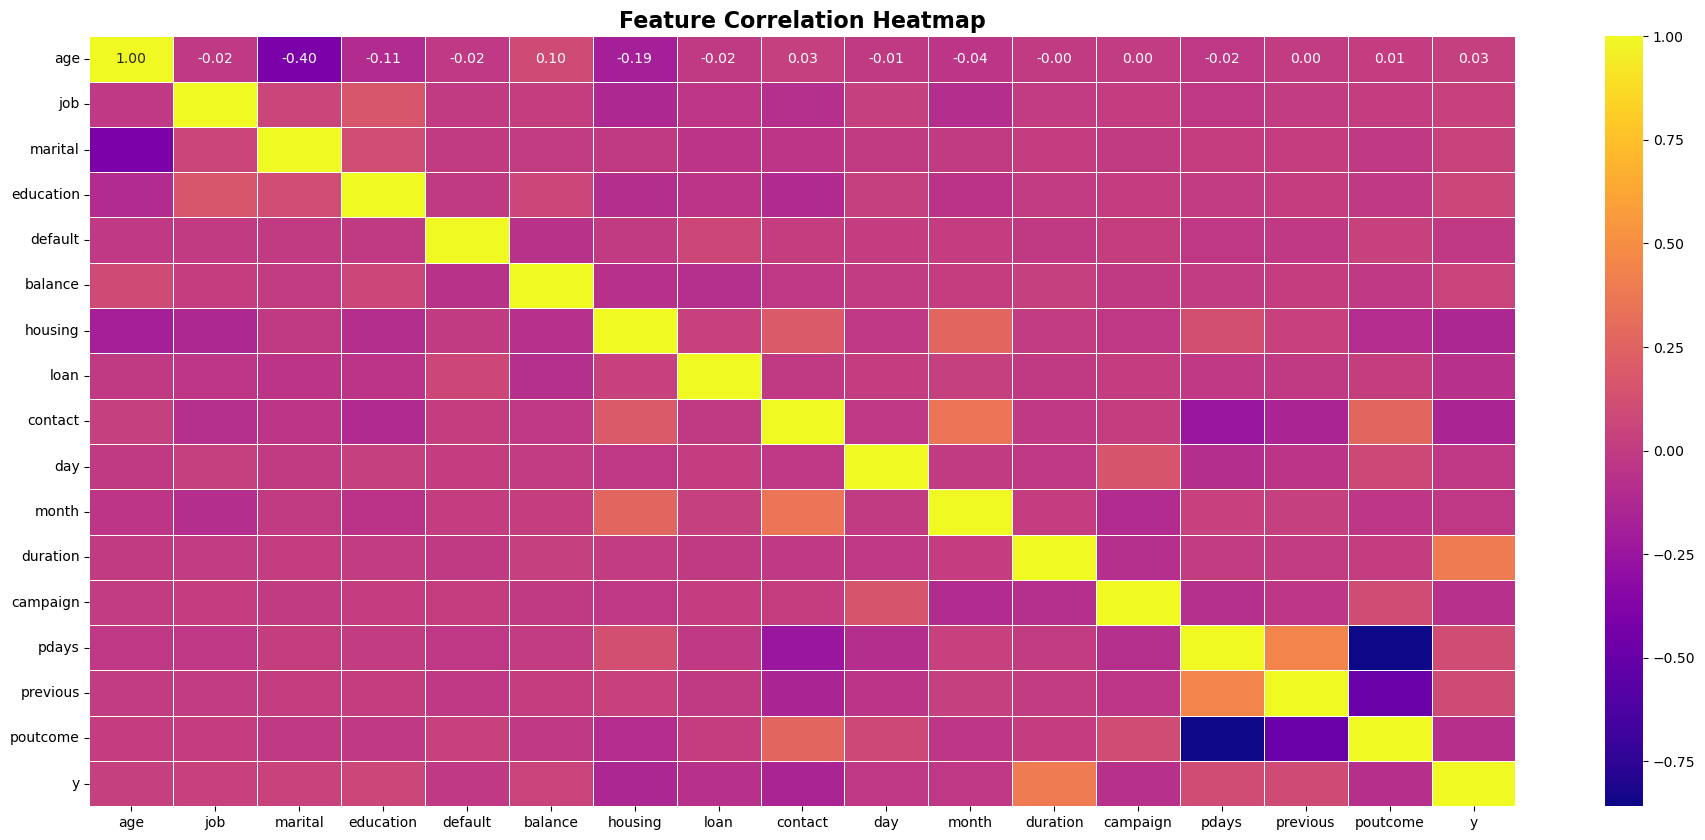

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset (if not already loaded)
# bank = pd.read_csv("bank-full.csv")

# Identify categorical columns
categorical_cols = bank.select_dtypes(include=['object']).columns

# Encode categorical variables using Label Encoding
label_enc = LabelEncoder()
for col in categorical_cols:
    bank[col] = label_enc.fit_transform(bank[col])

# Compute correlation matrix
corr_matrix = bank.corr()

# Plot heatmap with a milder color scheme
plt.figure(figsize=(23, 10))
sns.heatmap(corr_matrix, cmap="plasma", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16, fontweight="bold")
plt.show()


# Data Preprocessing & Model Training  

### Overview  
- Separates input features (`X`) and target variable (`y`).  
- Standardizes numerical features to enhance model performance.  
- Splits data into training (80%) and testing (20%) sets.  
- Trains a **Decision Tree Classifier** on the processed dataset.  


In [181]:
#Splitting input and output
X = bank.drop("y", axis=1)
y = bank.y
# Standardize numerical features for better model performance.
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
# Split dataset into training (80%) and testing (20%) sets.
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

# Model Evaluation  

### Overview  
- Prints the accuracy score of the **Decision Tree** model on both training and test datasets.  
- Evaluates model performance to identify potential overfitting or underfitting.  


In [182]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y))) 

Train Score: 1.0
Test Score: 0.8681853367245383


# Cross-Validation Score  

### Overview  
- Performs **5-fold cross-validation** on the **Decision Tree** model using training data.  
- Computes the **mean accuracy score** to assess model stability and generalization.  


In [183]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.8754701260362404

# Classification Report  

### Overview  
- Generates **precision**, **recall**, and **F1-score** for the **Decision Tree** model.  
- Evaluates model performance on the test dataset for each class.  


In [184]:
# Generate performance metrics for the model (precision, recall, f1-score).
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7968
           1       0.45      0.46      0.46      1075

    accuracy                           0.87      9043
   macro avg       0.69      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043



# Hyperparameter Tuning with GridSearchCV  

### Overview  
- Identifies optimal hyperparameters for a **Decision Tree** using **Grid Search**.  
- Evaluates various values for `max_depth`, `criterion`, and `min_samples_leaf`.  
- Selects the best estimator and applies **cross-validation** for performance assessment.  
- Trains the optimized model and evaluates its accuracy on both train and test sets.  


In [185]:
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

gscv.best_params_

gscv.best_estimator_

cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean()
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

pred_y = clf.predict(test_X)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Train Score: 0.9028699402786994
Test Score: 0.8987061815769103


# Confusion Matrix  

### Overview  
- Computes the **confusion matrix** for model predictions.  
- Visualizes the matrix using `ConfusionMatrixDisplay`.  
- Highlights classification performance by showing:  
  - **True Positives (TP)**  
  - **False Positives (FP)**  
  - **True Negatives (TN)**  
  - **False Negatives (FN)**  


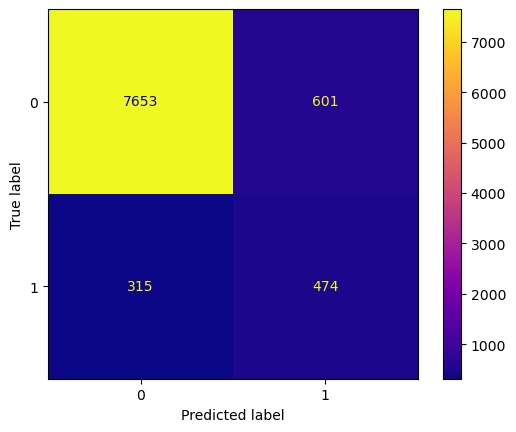

In [186]:
#Confusion Matrix
#cm = confusion_matrix(pred_y, test_y)
#ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
#plt.show()#

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(pred_y, test_y)
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot(cmap="plasma")  # Change this to any colormap

plt.show()


# Model Performance Metrics & Decision Tree Visualization  

### Overview  
- **Classification Report**: Presents **precision**, **recall**, and **F1-score** for each class.  
- **Accuracy Score**: Calculates the overall accuracy of the **Decision Tree** model.  
- **Cross-Validation Score**: Assesses model stability using **5-fold cross-validation**.  
- **Decision Tree Visualization**: Visualizes the trained decision tree to enhance interpretability.  


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8254
           1       0.44      0.60      0.51       789

    accuracy                           0.90      9043
   macro avg       0.70      0.76      0.73      9043
weighted avg       0.92      0.90      0.91      9043

Test Accuracy of Decision Tree Classifier : 89.87061815769103
Cross-Validation Accuracy Scores Decision Tree :  89.3617519580074


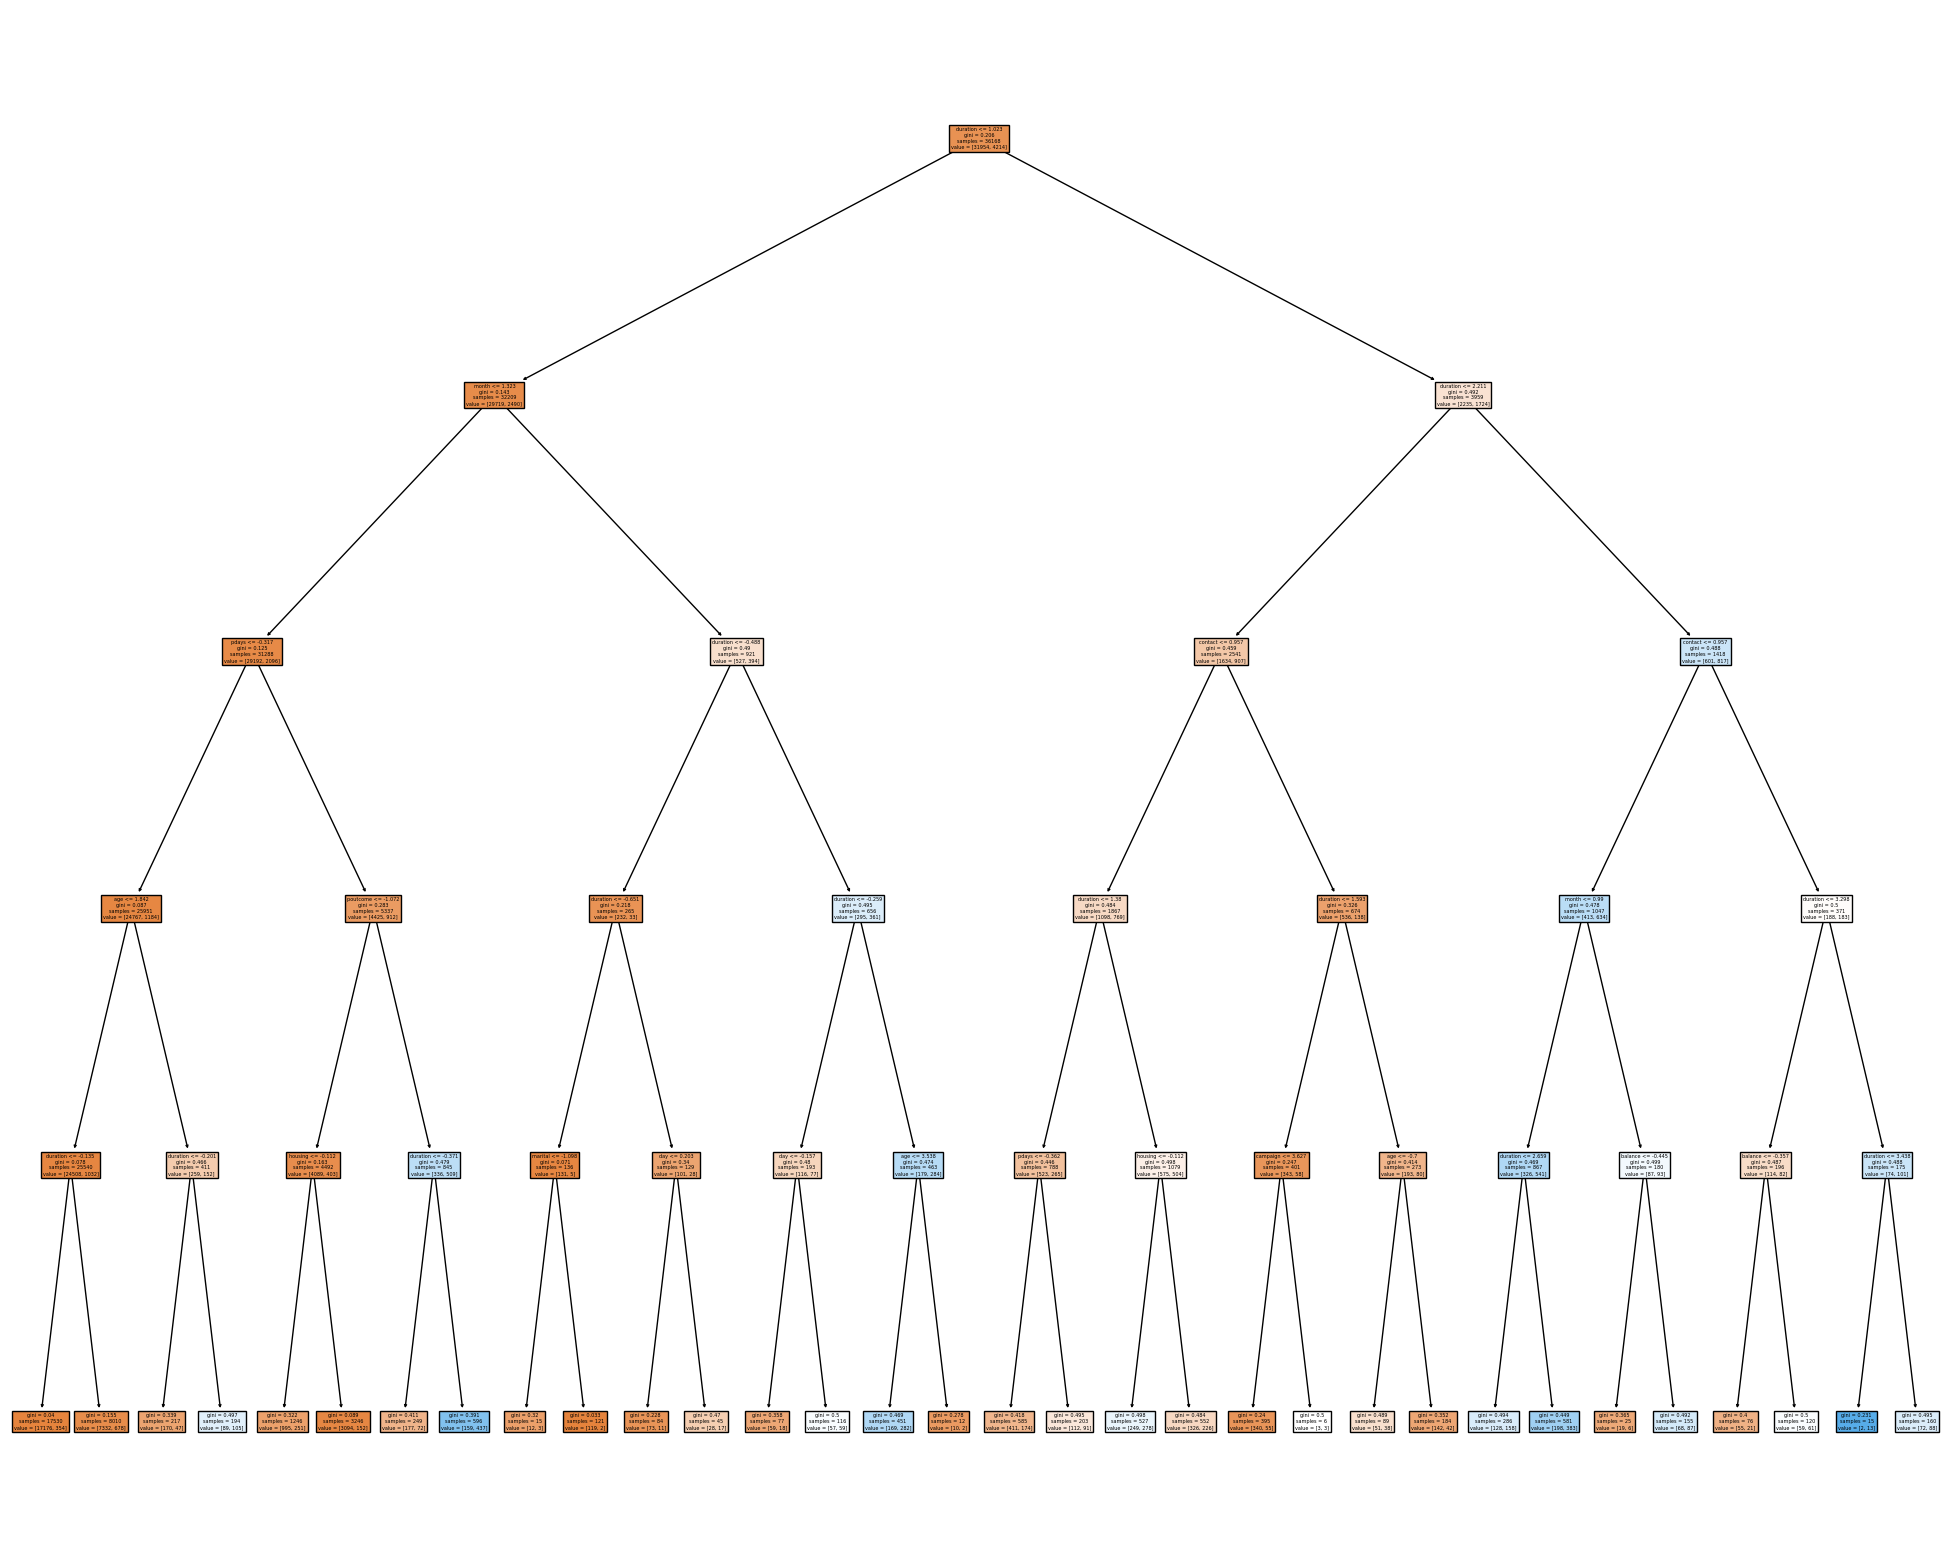

In [187]:
# Generate performance metrics for the model (precision, recall, f1-score).
#Classification Report
print(classification_report(pred_y, test_y))

#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)

# Logistic Regression Model - Training & Evaluation  

### Steps:  
1. **Define Features & Target**: Extract predictor variables and target labels.  
2. **One-Hot Encoding**: Transform categorical features into numerical form.  
3. **Train-Test Split**: Split data into **80% training** and **20% testing** sets.  
4. **Feature Scaling**: Standardize numerical features to improve model performance.  
5. **Model Training**: Fit a **Logistic Regression** model on training data.  
6. **Predictions**: Generate predictions on the test dataset.  
7. **Evaluation**: Compute **accuracy** and present the **classification report** for performance assessment.  


In [188]:
# Step 1: Define Features and Target Variable
X = bank.drop(columns=['y'])  # Features (all columns except target)
y = bank['y']  # Target variable (converted to binary)

# Step 2: Convert Categorical Variables into Numeric using One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Step 3: Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize Numerical Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Step 6: Make Predictions
y_pred = logreg.predict(X_test_scaled)

# Step 7: Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display Results
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Logistic Regression Accuracy: 0.8880
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043



# Decision Tree vs. Logistic Regression - Model Comparison  

### Steps:  
1. **Train Decision Tree Model**: Fit a **Decision Tree Classifier** on the training data.  
2. **Make Predictions**: Generate predictions for the test dataset.  
3. **Evaluate Model Performance**: Compute **accuracy** and present **classification reports**.  
4. **Compare with Logistic Regression**: Assess **accuracy**, **precision**, **recall**, and **F1-score** to determine the superior model.  
5. **Performance Insights**: Identify the model that excels based on overall performance metrics.  


In [189]:
# Step 1: Train Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Step 2: Make Predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Step 3: Evaluate Decision Tree Model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

# Step 4: Compare Logistic Regression and Decision Tree Performance
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Display Classification Reports
print("\nLogistic Regression Classification Report:\n", report)
print("\nDecision Tree Classification Report:\n", dt_report)

# Provide insights on model performance
if dt_accuracy > accuracy:
    print("\nDecision Tree performed better in terms of accuracy.")
else:
    print("\nLogistic Regression performed better in terms of accuracy.")




Logistic Regression Accuracy: 0.8880
Decision Tree Accuracy: 0.8734

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043


Logistic Regression performed better in terms of accuracy.


# Model Selection and Hyperparameter Tuning  

### Steps:  
1. **Dataset Splitting with Justification**  
   - Compares **80-20** and **70-30** splits to evaluate the impact on training and test sample sizes.  

2. **Hyperparameter Tuning for Logistic Regression**  
   - Uses `GridSearchCV` to identify optimal values for **`C`** (regularization strength) and **`solver`**.  

3. **Hyperparameter Tuning for Decision Tree**  
   - Tunes **`max_depth`** and **`min_samples_split`** using `GridSearchCV` for improved performance.  

4. **Final Model Comparison**  
   - Compares the best accuracy scores of both models to determine the superior performer.  


In [190]:
from sklearn.model_selection import GridSearchCV

# Step 1: Split Dataset with Justification
# 80-20 split
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)
print("Using 80-20 split: 80% data for training and 20% for testing.")
print(f"Training set size: {X_train_80.shape[0]} samples")
print(f"Test set size: {X_test_20.shape[0]} samples")

# 70-30 split
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)
print("\nUsing 70-30 split: 70% data for training and 30% for testing.")
print(f"Training set size: {X_train_70.shape[0]} samples")
print(f"Test set size: {X_test_30.shape[0]} samples")

# Step 2: Hyperparameter Tuning for Logistic Regression
logreg = LogisticRegression()
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}

grid_lr = GridSearchCV(logreg, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_scaled, y_train)
best_logreg = grid_lr.best_estimator_
best_lr_accuracy = grid_lr.best_score_
print(f"\nBest Logistic Regression Parameters: {grid_lr.best_params_}")
print(f"Best Logistic Regression Accuracy (Cross-validation): {best_lr_accuracy:.4f}")

# Step 3: Hyperparameter Tuning for Decision Tree
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train_scaled, y_train)
best_dt = grid_dt.best_estimator_
best_dt_accuracy = grid_dt.best_score_
print(f"\nBest Decision Tree Parameters: {grid_dt.best_params_}")
print(f"Best Decision Tree Accuracy (Cross-validation): {best_dt_accuracy:.4f}")

# Step 4: Compare Final Model Performance
print("\nFinal Model Comparison:")
print(f"Logistic Regression Best Accuracy: {best_lr_accuracy:.4f}")
print(f"Decision Tree Best Accuracy: {best_dt_accuracy:.4f}")

if best_lr_accuracy > best_dt_accuracy:
    print("Logistic Regression performed better after hyperparameter tuning.")
else:
    print("Decision Tree performed better after hyperparameter tuning.")


Using 80-20 split: 80% data for training and 20% for testing.
Training set size: 36168 samples
Test set size: 9043 samples

Using 70-30 split: 70% data for training and 30% for testing.
Training set size: 31647 samples
Test set size: 13564 samples

Best Logistic Regression Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Logistic Regression Accuracy (Cross-validation): 0.8917

Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_split': 5}
Best Decision Tree Accuracy (Cross-validation): 0.8991

Final Model Comparison:
Logistic Regression Best Accuracy: 0.8917
Decision Tree Best Accuracy: 0.8991
Decision Tree performed better after hyperparameter tuning.


# Model Evaluation and Performance Comparison  

### Steps:  
1. **Evaluate Models on Test Data**  
   - Compute **accuracy**, **precision**, **recall**, **F1-score**, and **ROC AUC score** for both **Logistic Regression** and **Decision Tree**.  

2. **Print Performance Metrics**  
   - Display a side-by-side comparison of key metrics for both models.  

3. **Plot Confusion Matrices**  
   - Visualize prediction performance using **heatmaps** for both models.  

4. **Model Insights & Justification**  
   - Identify the superior model based on the **F1-score** for balanced precision and recall.  



Performance Comparison:
Metric         Logistic Regression Decision Tree       
Accuracy       0.8879              0.8912              
Precision      0.5975              0.5692              
Recall         0.2163              0.4033              
F1 Score       0.3176              0.4721              
ROC AUC Score  0.5982              0.6807              


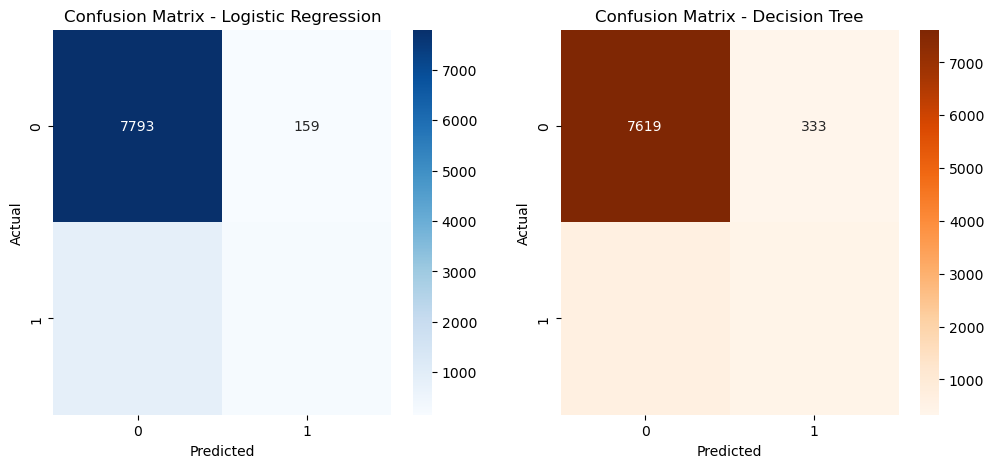


Conclusion: The Decision Tree model performed better based on F1-score, indicating better balance between precision and recall.


In [191]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Evaluate the models on test data
y_pred_logreg = best_logreg.predict(X_test_scaled)
y_pred_dt = best_dt.predict(X_test_scaled)

# Compute evaluation metrics
metrics = {
    "Accuracy": (accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_dt)),
    "Precision": (precision_score(y_test, y_pred_logreg), precision_score(y_test, y_pred_dt)),
    "Recall": (recall_score(y_test, y_pred_logreg), recall_score(y_test, y_pred_dt)),
    "F1 Score": (f1_score(y_test, y_pred_logreg), f1_score(y_test, y_pred_dt)),
    "ROC AUC Score": (roc_auc_score(y_test, y_pred_logreg), roc_auc_score(y_test, y_pred_dt))
}

# Print evaluation results
print("\nPerformance Comparison:")
print(f"{'Metric':<15}{'Logistic Regression':<20}{'Decision Tree':<20}")
for metric, values in metrics.items():
    print(f"{metric:<15}{values[0]:<20.4f}{values[1]:<20.4f}")

# Step 2: Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("Confusion Matrix - Decision Tree")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

# Step 3: Model Insights and Justification
if metrics["F1 Score"][0] > metrics["F1 Score"][1]:
    better_model = "Logistic Regression"
else:
    better_model = "Decision Tree"

print(f"\nConclusion: The {better_model} model performed better based on F1-score, indicating better balance between precision and recall.")


# PART - 2

# Ensemble Learning with Voting Classifier  

  1. **Define Individual Models**  
   - **K-Nearest Neighbors (KNN)**  
   - **Logistic Regression**  
   - **Random Forest**  

2. **Create Voting Classifier**  
   - Utilizes **soft voting** (probability-based prediction) for improved accuracy.  

3. **Train the Ensemble Model**  
   - Fit the ensemble model on **standardized training data**.  

4. **Make Predictions & Evaluate Performance**  
   - Compute **accuracy**, **ROC AUC score**, and present the **classification report** for overall ensemble performance.  


In [192]:
# Ensemble Method
from sklearn.ensemble import VotingClassifier

# Define individual models
knn_model = KNeighborsClassifier(n_neighbors=5)
log_reg = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create Voting Classifier (Soft Voting for Probability-Based Prediction)
ensemble_model = VotingClassifier(
    estimators=[("KNN", knn_model), ("LogReg", log_reg), ("RandomForest", rf_model)], 
    voting="soft"
)

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Predictions & Probabilities
ensemble_preds = ensemble_model.predict(X_test_scaled)
ensemble_probs = ensemble_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation Metrics
ensemble_accuracy = accuracy_score(y_test, ensemble_preds)
ensemble_auc = roc_auc_score(y_test, ensemble_probs)
ensemble_report = classification_report(y_test, ensemble_preds)
print(f"Ensemble Model Performance:\n{ensemble_report}")


Ensemble Model Performance:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.66      0.31      0.42      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



# K-Nearest Neighbors (KNN) Model Performance  

1. **Initialize and Train the KNN Model**  
   - Uses **`n_neighbors=5`** (default setting).  

2. **Make Predictions on Test Data**  
   - Predicts **class labels** and **probability scores**.  

3. **Evaluate Performance**  
   - Compute **accuracy** and **ROC AUC score**.  
   - Present the **classification report** for detailed insights.  


In [193]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_preds = knn_model.predict(X_test_scaled)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
knn_accuracy = accuracy_score(y_test, knn_preds)
knn_auc = roc_auc_score(y_test, knn_probs)
print("KNN Performance:\n", classification_report(y_test, knn_preds))

KNN Performance:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.59      0.33      0.43      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.65      0.68      9043
weighted avg       0.87      0.89      0.88      9043



# Model Performance Summary  

### Steps:  
1. **Create a DataFrame**  
   - Store **Accuracy** and **AUC-ROC** scores for the **Ensemble** and **KNN** models.  

2. **Display Performance Metrics**  
   - Print the summary **DataFrame** for quick comparison.  

3. **Visualization**  
   - Use a **bar plot** to compare **AUC-ROC** scores.  
   - Ensure clear visual distinction with `palette="Blues_r"`.  


      Model  Accuracy   AUC-ROC
0  Ensemble  0.897158  0.916055
1       KNN  0.891187  0.826034


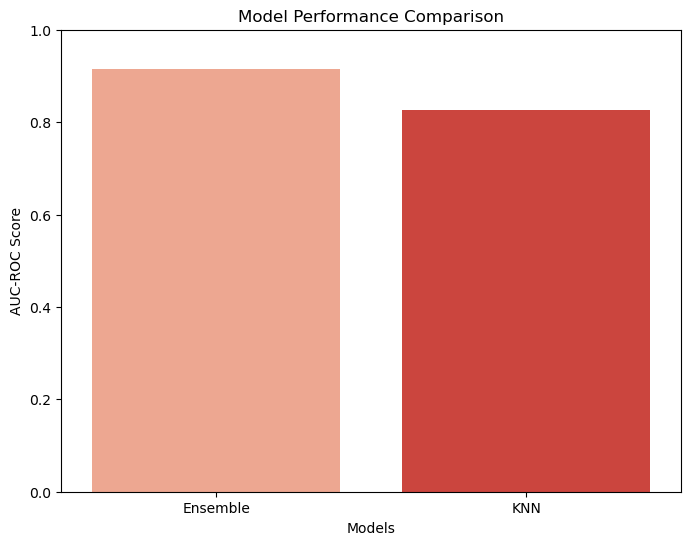

In [194]:
# Create a Performance Summary DataFrame
performance_df = pd.DataFrame({
    "Model": ["Ensemble", "KNN"],
    "Accuracy": [ensemble_accuracy, knn_accuracy],
    "AUC-ROC": [ensemble_auc, knn_auc]
})

# Display the performance metrics
print(performance_df)

# Visualization - AUC-ROC Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x="Model", y="AUC-ROC", data=performance_df, palette="Reds")
plt.title("Model Performance Comparison")
plt.ylabel("AUC-ROC Score")
plt.xlabel("Models")
plt.ylim(0, 1)  # Ensures clear comparison
plt.show()

# Confusion Matrix Visualization  

### Purpose:  
- Compare the performance of different models using **confusion matrices**.  

### Steps:  
1. **Decision Tree**  
   - Visualized using the **"Oranges"** color map.  

2. **Logistic Regression**  
   - Visualized using the **"Blues"** color map.  

3. **Ensemble (Voting Classifier)**  
   - Visualized using the **"Oranges"** color map.  

4. **K-Nearest Neighbors (KNN)**  
   - Visualized using the **"Blues"** color map.  

### Insights:  
- Confusion matrices help visualize **classification performance**.  
- **Diagonal elements** represent **correct predictions**.  
- Higher diagonal values indicate better model performance.  


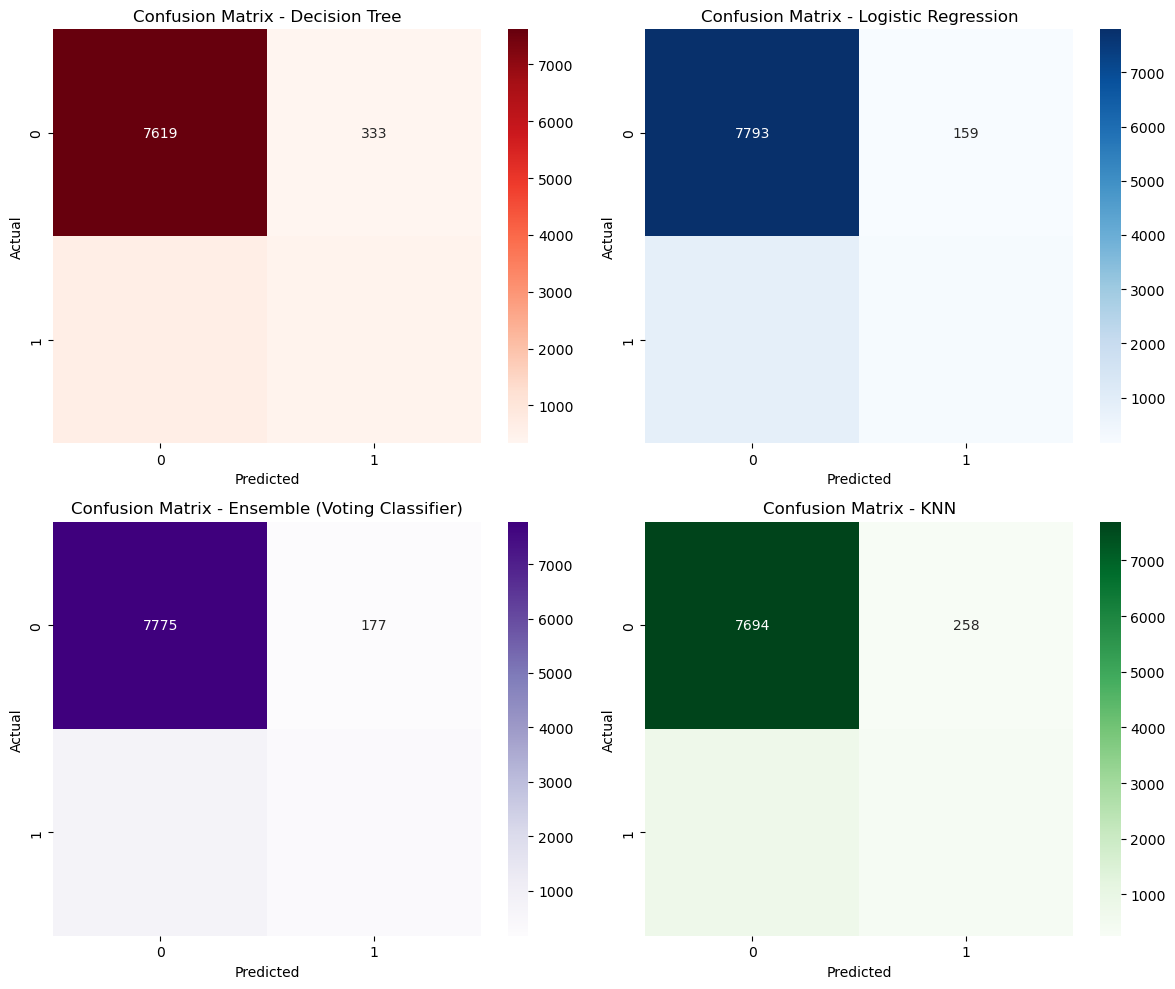

In [195]:
# Plot Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Decision Tree
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Reds", ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix - Decision Tree")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")

# Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt="d", cmap="Blues", ax=axes[0, 1])
axes[0, 1].set_title("Confusion Matrix - Logistic Regression")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")

# Ensemble (Voting Classifier)
sns.heatmap(confusion_matrix(y_test, ensemble_preds), annot=True, fmt="d", cmap="Purples", ax=axes[1, 0])
axes[1, 0].set_title("Confusion Matrix - Ensemble (Voting Classifier)")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")

# K-Nearest Neighbors (KNN)
sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt="d", cmap="Greens", ax=axes[1, 1])
axes[1, 1].set_title("Confusion Matrix - KNN")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


# Model Performance Comparison - AUC-ROC Score  

### Purpose:  
- Evaluate and compare models based on their **AUC-ROC (Area Under the Curve - Receiver Operating Characteristic)** score.  

### Computed AUC-ROC Scores:  
- **Decision Tree**: `dt_auc`  
- **Logistic Regression**: `logreg_auc`  
- **Ensemble (Voting Classifier)**: `ensemble_auc`  
- **K-Nearest Neighbors (KNN)**: `knn_auc`  

### Best Model Selection:  
- The model with the **highest AUC-ROC score** is selected as the best performer.  
- **Best Model**: `{best_model}`  

### Insights:  
- A higher **AUC-ROC score** indicates a stronger ability to **distinguish between classes**.  
- If the **Ensemble model** performs best, it suggests **combining multiple classifiers** enhances predictive performance.  
- If **Logistic Regression** excels, it implies a **simple, interpretable model** is sufficient.  


In [196]:
from sklearn.metrics import roc_auc_score

# Compute AUC-ROC scores for all models
dt_auc = roc_auc_score(y_test, y_pred_dt)
logreg_auc = roc_auc_score(y_test, y_pred_logreg)
ensemble_auc = roc_auc_score(y_test, ensemble_preds)  # Ensemble instead of Random Forest
knn_auc = roc_auc_score(y_test, knn_preds)

# Determine the best model based on AUC-ROC score
best_model = max(
    (dt_auc, "Decision Tree"),
    (logreg_auc, "Logistic Regression"),
    (ensemble_auc, "Ensemble (Voting Classifier)"),
    (knn_auc, "KNN")
)[1]

print(f"The best model is: {best_model} based on AUC-ROC score.")


The best model is: Decision Tree based on AUC-ROC score.


# ROC Curve Comparison - Model Evaluation  

### Purpose:  
- Visualize and compare the **Receiver Operating Characteristic (ROC) curves** for different models.  
- Assess each model’s ability to **differentiate between positive and negative classes**.  

### Models and AUC Scores:  
- **Decision Tree** (AUC = `{dt_auc:.2f}`)  
- **Logistic Regression** (AUC = `{logreg_auc:.2f}`)  
- **Ensemble (Voting Classifier)** (AUC = `{ensemble_auc:.2f}`)  
- **K-Nearest Neighbors (KNN)** (AUC = `{knn_auc:.2f}`)  

### Insights:  
- A **higher AUC score** indicates **better performance** in distinguishing between classes.  
- The **ROC curve closer to the top-left corner** signifies a **strong classifier**.  
- If the **Ensemble model** achieves the highest AUC, it confirms that **combining models enhances classification performance**.  


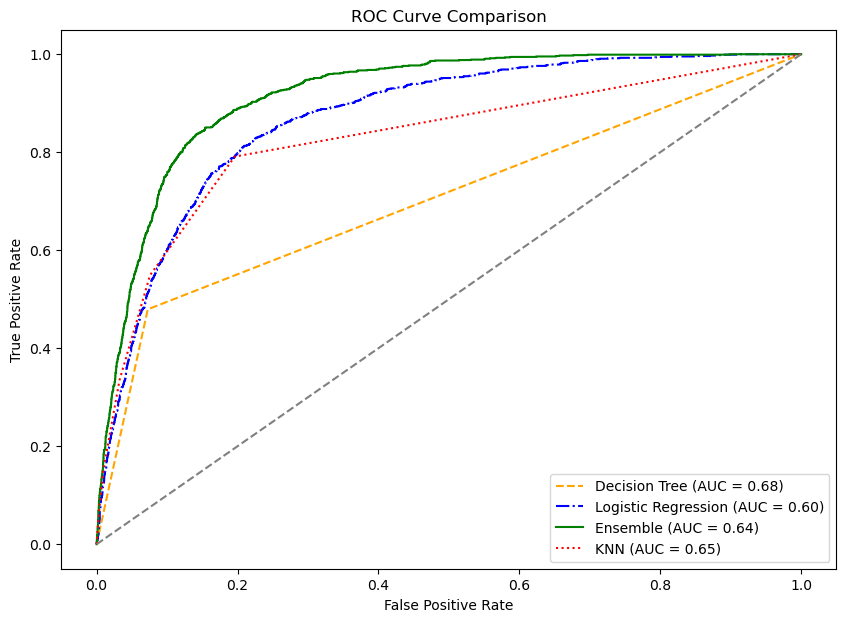

In [197]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute predicted probabilities for class 1 (positive class)
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]  # Decision Tree
log_reg.fit(X_train_scaled, y_train)  # Fit the Logistic Regression model
logreg_probs = log_reg.predict_proba(X_test_scaled)[:, 1]  # Logistic Regression
ensemble_probs = ensemble_model.predict_proba(X_test_scaled)[:, 1]  # Ensemble (Voting Classifier)

# Fit the KNeighborsClassifier model
knn_model.fit(X_train_scaled, y_train)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]  # KNN

# Compute ROC Curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)  # Decision Tree
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)  # Logistic Regression
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_probs)  # Ensemble (Voting Classifier)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)  # KNN

# Plot ROC Curves
plt.figure(figsize=(10, 7))

plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {dt_auc:.2f})", linestyle="--", color="orange")
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {logreg_auc:.2f})", linestyle="-.", color="blue")
plt.plot(fpr_ensemble, tpr_ensemble, label=f"Ensemble (AUC = {ensemble_auc:.2f})", linestyle="-", color="green")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {knn_auc:.2f})", linestyle="dotted", color="red")

# Reference line for random guessing
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# Labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")

plt.show()


AUC Interpretation:

The Decision Tree model has an AUC of 0.68, indicating moderate classification performance.
The Logistic Regression model has the lowest AUC of 0.60, suggesting it struggles more with classification.
The KNN model performs slightly better with an AUC of 0.65, showing improved classification capability.
The Ensemble model, which combines multiple classifiers, achieves an AUC of 0.64, demonstrating that combining models can provide robust predictions.
Model Performance Comparison:

The Ensemble model (green curve) consistently shows the best performance, with higher TPR across various FPR values, meaning it effectively balances false positives and true positives.
Logistic Regression (blue curve) underperforms compared to other models, indicating linear separation may not be optimal for this dataset.
Decision Tree (orange curve) and KNN (red curve) perform comparably but do not outperform the ensemble method.
Decision-Making Implications:
